# Pre-processing Century Deposit Data

This notebook is not meant to be a working example of CoFI. It's rather a notebook that prepares the dataset needed for the [Century Data DCIP example](pygimli_dcip_century_data.ipynb).

Note: The preprocessing code is adapted from a SimPEG example authored by Lindsey Heagy and presented at Transform 2020. [Original Materials](https://curvenote.com/@simpeg/transform-2020-simpeg-tutorial/!6DDumb03Le6D8N8xuJNs)

## Load the dataset

In [1]:
# download the dataset

!git clone https://github.com/simpeg/transform-2020-simpeg.git
%cd transform-2020-simpeg/

fatal: destination path 'transform-2020-simpeg' already exists and is not an empty directory.
/home/jiawen/cofi/docs/source/cofi-examples/notebooks/pygimli_dcip/transform-2020-simpeg


In [4]:
import os
import numpy as np

In [5]:
os.listdir('century')

['27750N',
 '46200E',
 '46800E',
 '47700E',
 '47200E',
 'Data_in_3D_format',
 'geologic_section.csv',
 'gmt',
 '47000E']

In [6]:
line = "46800E"
print(os.listdir(os.path.join('century',line)))

dc_data_file = f"./century/{line}/{line[:-1]}POT.OBS"
ip_data_file = f"./century/{line}/{line[:-1]}IP.OBS"

['468MESH.DAT', '46800POT.OBS', '46800IP.OBS', 'DCMODA.PRE', 'DCMODA.CON', 'IPMODA.CHG', 'IPMODA.PRE']


In [9]:
def read_dcip_data(filename, verbose=True):
    """
    Read in a .OBS file from the Century data set into a python dictionary. 
    The format is the old UBC-GIF DCIP format.
    
    Parameters
    ----------
    filename : str
        Path to the file to be parsed
    
    verbose: bool
        Print some things? 
    
    
    Returns
    -------
    dict
        A dictionary with the locations of
        - a_locations: the positive source electrode locations (numpy array) 
        - b_locations: the negative source electrode locations (numpy array) 
        - m_locations: the receiver locations (list of numpy arrays)
        - n_locations: the receiver locations (list of numpy arrays)
        - observed_data: observed data (list of numpy arrays)
        - standard_deviations: assigned standard deviations (list of numpy arrays)
        - n_sources: number of sources (int)
    
    """
    
    # read in the text file as a numpy array of strings (each row is an entry)
    contents = np.genfromtxt(filename, delimiter=' \n', dtype=str)
    
    # the second line has the number of sources, current, and data type (voltages if 1)
    n_sources = int(contents[1].split()[0])
    
    if verbose is True: 
        print(f"number of sources: {n_sources}")
    
    # initialize storage for the electrode locations and data
    a_locations = np.zeros(n_sources)
    b_locations = np.zeros(n_sources)
    m_locations = []
    n_locations = []
    observed_data = []
    standard_deviations = []
    
    # index to track where we have read in content 
    content_index = 1 
    
    # loop over sources 
    for i in range(n_sources):
        # start by reading in the source info 
        content_index = content_index + 1  # read the next line
        a_location, b_location, nrx = contents[content_index].split()  # this is a string
        
        # convert the strings to a float for locations and an int for the number of receivers
        a_locations[i] = float(a_location)
        b_locations[i] = float(b_location)
        nrx = int(nrx)

        if verbose is True: 
            print(f"Source {i}: A-loc: {a_location}, B-loc: {b_location}, N receivers: {nrx}")

        # initialize space for receiver locations, observed data associated with this source
        m_locations_i, n_locations_i = np.zeros(nrx), np.zeros(nrx)
        observed_data_i, standard_deviations_i = np.zeros(nrx), np.zeros(nrx)

        # read in the receiver info 
        for j in range(nrx):
            content_index = content_index + 1  # read the next line
            m_location, n_location, datum, std = contents[content_index].split()

            # convert the locations and data to floats, and store them
            m_locations_i[j] = float(m_location)
            n_locations_i[j] = float(n_location)
            observed_data_i[j] = float(datum)
            standard_deviations_i[j] = float(std)

        # append the receiver info to the lists
        m_locations.append(m_locations_i)
        n_locations.append(n_locations_i)
        observed_data.append(observed_data_i)
        standard_deviations.append(standard_deviations_i)
    
    return {
        "a_locations": a_locations,
        "b_locations": b_locations, 
        "m_locations": m_locations,
        "n_locations": n_locations,
        "observed_data": observed_data, 
        "standard_deviations": standard_deviations,
        "n_sources": n_sources, 
    }

# Apparent Resistivity

In [10]:
dc_data_dict = read_dcip_data(dc_data_file)

number of sources: 27
Source 0: A-loc: 26000.000000, B-loc: 26100.000000, N receivers: 2
Source 1: A-loc: 26100.000000, B-loc: 26200.000000, N receivers: 3
Source 2: A-loc: 26200.000000, B-loc: 26300.000000, N receivers: 4
Source 3: A-loc: 26300.000000, B-loc: 26400.000000, N receivers: 5
Source 4: A-loc: 26400.000000, B-loc: 26500.000000, N receivers: 6
Source 5: A-loc: 26500.000000, B-loc: 26600.000000, N receivers: 7
Source 6: A-loc: 26600.000000, B-loc: 26700.000000, N receivers: 7
Source 7: A-loc: 26700.000000, B-loc: 26800.000000, N receivers: 6
Source 8: A-loc: 26800.000000, B-loc: 26900.000000, N receivers: 6
Source 9: A-loc: 26900.000000, B-loc: 27000.000000, N receivers: 6
Source 10: A-loc: 27000.000000, B-loc: 27100.000000, N receivers: 6
Source 11: A-loc: 27100.000000, B-loc: 27200.000000, N receivers: 6
Source 12: A-loc: 27200.000000, B-loc: 27300.000000, N receivers: 6
Source 13: A-loc: 27300.000000, B-loc: 27400.000000, N receivers: 6
Source 14: A-loc: 27400.000000, B-lo

In [11]:
for key, value in dc_data_dict.items():
    print(f"{key:<20}: {type(value)}")

a_locations         : <class 'numpy.ndarray'>
b_locations         : <class 'numpy.ndarray'>
m_locations         : <class 'list'>
n_locations         : <class 'list'>
observed_data       : <class 'list'>
standard_deviations : <class 'list'>
n_sources           : <class 'int'>


In [12]:
dc_data_dict["a_locations"]

array([26000., 26100., 26200., 26300., 26400., 26500., 26600., 26700.,
       26800., 26900., 27000., 27100., 27200., 27300., 27400., 27500.,
       27600., 27700., 27800., 27900., 28000., 28100., 28200., 28300.,
       28400., 28500., 28600.])

## Create SimPEG Data and Survey

In [29]:
import matplotlib.pyplot as plt
import ipywidgets

from SimPEG import (
    Data, maps,
    data_misfit, regularization, optimization, inverse_problem, 
    inversion, directives
) 
from SimPEG.electromagnetics import resistivity as dc
from SimPEG.electromagnetics import induced_polarization as ip

In [14]:
# initialize an empty list for each 
source_list = []

for i in range(dc_data_dict["n_sources"]):
    
    # receiver electrode locations in 2D 
    m_locs = np.vstack([
        dc_data_dict["m_locations"][i], 
        np.zeros_like(dc_data_dict["m_locations"][i])
    ]).T
    n_locs = np.vstack([
        dc_data_dict["n_locations"][i],
        np.zeros_like(dc_data_dict["n_locations"][i])
    ]).T
    
    # construct the receiver object 
    receivers = dc.receivers.Dipole(locations_m=m_locs, locations_n=n_locs)
    
    # construct the source 
    source = dc.sources.Dipole(
        location_a=np.r_[dc_data_dict["a_locations"][i], 0.],
        location_b=np.r_[dc_data_dict["b_locations"][i], 0.],
        receiver_list=[receivers]
    )
    
    # append the new source to the source list
    source_list.append(source)


In [15]:
dc_survey = dc.Survey(source_list=source_list)

In [16]:
dc_data = Data(
    survey=dc_survey, 
    dobs=np.hstack(dc_data_dict["observed_data"]),
    standard_deviation=np.hstack(dc_data_dict["standard_deviations"])
)

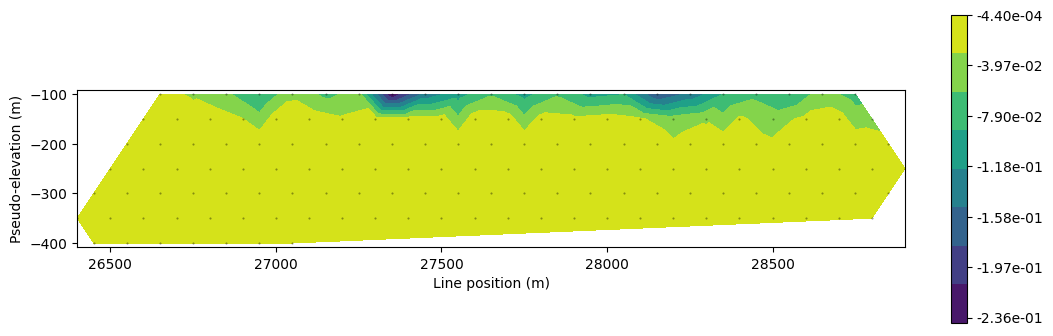

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
dc.utils.plot_pseudosection(
    dc_data, data_type="potential",
    plot_type="contourf", data_locations=True, ax=ax,
)
ax.set_aspect(1.5)

### Preprocess into apparent resistivity

We've loaded measurements data in units of volts above. Now we translate them into apparent resistivity.

See [this SimPEG notebook](https://github.com/simpeg/transform-2020-simpeg/blob/main/1-century-dcip-inversion.ipynb) for more details.

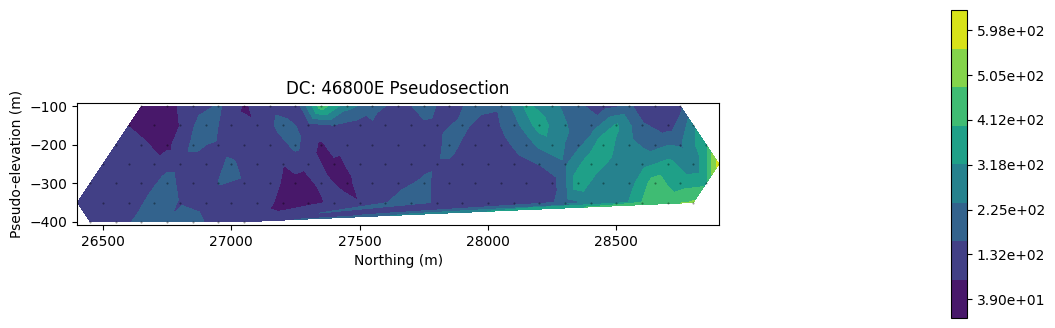

In [18]:
# plot psuedosection
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
dc.utils.plot_pseudosection(
    dc_data, data_type="apparent resistivity", 
    plot_type="contourf", data_locations=True, ax=ax, cbar_opts={"pad":0.25}
)
ax.set_aspect(1.5)  # some vertical exxageration
ax.set_title(f"DC: {line} Pseudosection")
ax.set_xlabel("Northing (m)");

In [19]:
apparent_resistivity = dc.utils.apparent_resistivity_from_voltage(dc_survey, dc_data.dobs)
geometric_factor = dc.utils.geometric_factor(dc_survey)

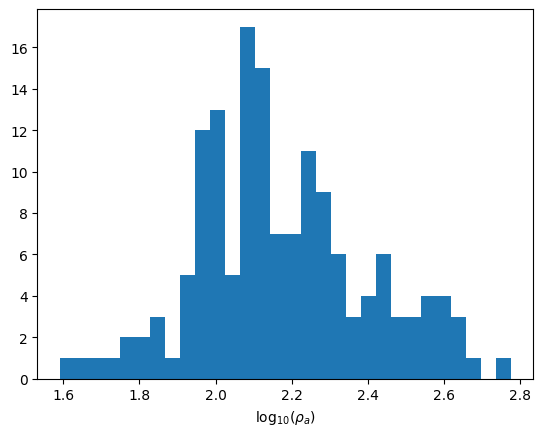

In [20]:
fig, ax = plt.subplots(1, 1)
out = ax.hist(np.log10(apparent_resistivity), bins=30)
ax.set_xlabel("log$_{10}(\\rho_a)$");

In [21]:
rho0 = np.median(apparent_resistivity)
rho0

135.90619481429147

In [22]:
len(apparent_resistivity)

151

In [23]:
apparent_resistivity[:10]

array([134.05945681, 126.67102145, 108.1971648 , 104.50304114,
        99.7534294 ,  95.00211999,  96.32186623,  92.89159212,
       197.92347102,  95.00194092])

# Apparent Chargeability

In [37]:
ip_data_dict = read_dcip_data(ip_data_file)

number of sources: 27
Source 0: A-loc: 26000, B-loc: 26100, N receivers: 2
Source 1: A-loc: 26100, B-loc: 26200, N receivers: 3
Source 2: A-loc: 26200, B-loc: 26300, N receivers: 4
Source 3: A-loc: 26300, B-loc: 26400, N receivers: 5
Source 4: A-loc: 26400, B-loc: 26500, N receivers: 6
Source 5: A-loc: 26500, B-loc: 26600, N receivers: 7
Source 6: A-loc: 26600, B-loc: 26700, N receivers: 7
Source 7: A-loc: 26700, B-loc: 26800, N receivers: 6
Source 8: A-loc: 26800, B-loc: 26900, N receivers: 6
Source 9: A-loc: 26900, B-loc: 27000, N receivers: 6
Source 10: A-loc: 27000, B-loc: 27100, N receivers: 6
Source 11: A-loc: 27100, B-loc: 27200, N receivers: 6
Source 12: A-loc: 27200, B-loc: 27300, N receivers: 6
Source 13: A-loc: 27300, B-loc: 27400, N receivers: 6
Source 14: A-loc: 27400, B-loc: 27500, N receivers: 6
Source 15: A-loc: 27500, B-loc: 27600, N receivers: 6
Source 16: A-loc: 27600, B-loc: 27700, N receivers: 6
Source 17: A-loc: 27700, B-loc: 27800, N receivers: 6
Source 18: A-loc

In [38]:
for key, value in ip_data_dict.items():
    print(f"{key:<20}: {type(value)}")

a_locations         : <class 'numpy.ndarray'>
b_locations         : <class 'numpy.ndarray'>
m_locations         : <class 'list'>
n_locations         : <class 'list'>
observed_data       : <class 'list'>
standard_deviations : <class 'list'>
n_sources           : <class 'int'>


In [39]:
ip_data_dict["a_locations"]

array([26000., 26100., 26200., 26300., 26400., 26500., 26600., 26700.,
       26800., 26900., 27000., 27100., 27200., 27300., 27400., 27500.,
       27600., 27700., 27800., 27900., 28000., 28100., 28200., 28300.,
       28400., 28500., 28600.])

In [40]:
# initialize an empty list for each 
source_list_ip = []

for i in range(ip_data_dict["n_sources"]):
    
    # receiver electrode locations in 2D 
    m_locs = np.vstack([
        ip_data_dict["m_locations"][i], 
        np.zeros_like(ip_data_dict["m_locations"][i])
    ]).T
    n_locs = np.vstack([
        ip_data_dict["n_locations"][i],
        np.zeros_like(ip_data_dict["n_locations"][i])
    ]).T
    
    # construct the receiver object 
    receivers = ip.receivers.Dipole(
        locations_m=m_locs, locations_n=n_locs, data_type="apparent_chargeability"
    )
    
    # construct the source 
    source = ip.sources.Dipole(
        location_a=np.r_[ip_data_dict["a_locations"][i], 0.],
        location_b=np.r_[ip_data_dict["b_locations"][i], 0.],
        receiver_list=[receivers]
    )
    
    # append the new source to the source list
    source_list_ip.append(source)

In [41]:
survey_ip = ip.Survey(source_list_ip)

In [42]:
ip_data = Data(
    survey=dc_survey, 
    dobs=np.hstack(ip_data_dict["observed_data"]), 
    standard_deviation=np.hstack(ip_data_dict["standard_deviations"])
)

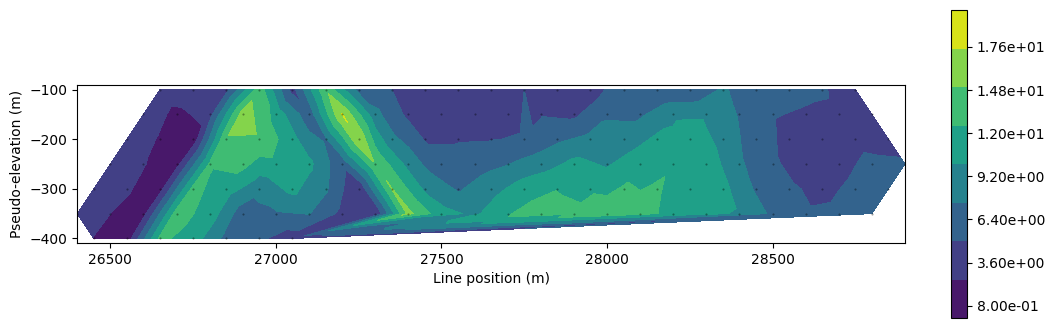

In [43]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
dc.utils.plot_pseudosection(
    ip_data, data_type="potential",
    plot_type="contourf", data_locations=True, ax=ax,
)
ax.set_aspect(1.5)

In [47]:
len(ip_data.dobs)

151

## Write data to file

In [48]:
processed_data = np.zeros((len(apparent_resistivity), 7))
processed_data[:,4] = apparent_resistivity
processed_data[:,5] = ip_data.dobs
processed_data[:,6] = geometric_factor

data_idx = 0
for i in range(len(dc_data_dict["a_locations"])):
    a_loc = dc_data_dict["a_locations"][i]
    b_loc = dc_data_dict["b_locations"][i]
    m_locs = dc_data_dict["m_locations"][i]
    n_locs = dc_data_dict["n_locations"][i]
    for j in range(len(m_locs)):
        processed_data[data_idx,0] = a_loc
        processed_data[data_idx,1] = b_loc
        processed_data[data_idx,2] = m_locs[j]
        processed_data[data_idx,3] = n_locs[j]
        data_idx += 1

processed_data[:5]

array([[ 2.60000000e+04,  2.61000000e+04,  2.67000000e+04,
         2.68000000e+04,  1.34059457e+02,  4.30000000e+00,
        -9.47350852e-06],
       [ 2.60000000e+04,  2.61000000e+04,  2.68000000e+04,
         2.69000000e+04,  1.26671021e+02,  2.40000000e+00,
        -6.31567234e-06],
       [ 2.61000000e+04,  2.62000000e+04,  2.67000000e+04,
         2.68000000e+04,  1.08197165e+02,  4.30000000e+00,
        -1.51576136e-05],
       [ 2.61000000e+04,  2.62000000e+04,  2.68000000e+04,
         2.69000000e+04,  1.04503041e+02,  2.50000000e+00,
        -9.47350852e-06],
       [ 2.61000000e+04,  2.62000000e+04,  2.69000000e+04,
         2.70000000e+04,  9.97534294e+01,  1.00000000e+00,
        -6.31567234e-06]])

In [49]:
np.savetxt(
    "../century_dc_data.txt", 
    processed_data, 
    header="# a_loc, b_loc, m_loc, n_loc, apparent_resistivity, apparent_chargeability, geometric_factor"
)

---

## Watermark

In [22]:
import SimPEG
SimPEG.__version__

'0.17.0'